# Gradient Descent #
Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum.
![gradient_descent_demystified[1].png](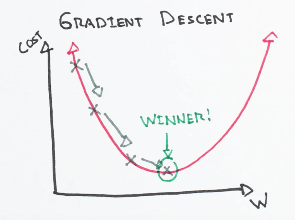)

### Learning Rate###
The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

### Cost function###
A Cost Function or Loss Function tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.

This is what a Gradient Descent looks like for a linear function when coded from scratch. For this, let's step away from NNs for a moment and consider just a simple linear regression function of y = mx + b

The following formulas tell us how to update regression variables of $m$ and $b$ to approach a "best fit" line.

$ \frac{\partial J}{\partial m}J(m,b) = -2\sum_{i = 1}^n x(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$
$ \frac{\partial J}{\partial b}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $

Given the formulas above, we can work with any dataset of $x$ and $y$ values to determine the best fit line. We simply iterate through our dataset and use the formulas above to determine an update to $m$ and $b$ that will bring us closer to the minimum. So ultimately, to descend along the cost function, we will use the calculations:

current_m = old_m $ -  (-2*\sum_{i=1}^n x_i*\epsilon_i )$

current_b = old_b $ - ( -2*\sum_{i=1}^n \epsilon_i )$:

In [75]:
# Setting up some sample data

# our data
first_show = {'x': 30, 'y': 45}
second_show = {'x': 40, 'y': 60}
third_show = {'x': 100, 'y': 150}

shows = [first_show, second_show, third_show]



Now we set our initial regression line by initializing $m$ and $b$ to zero. Then to update our regression line, we iterate through each of the points in the dataset, and at each iteration, change our update_to_b by $2*\epsilon$ and change our update_to_m by $2*x*\epsilon$.

In [76]:
b_current = 0
m_current = 0

# amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

def error_at(point, b, m):
    return (m*point['x'] + b - point['y'])

for i in range(0, len(shows)):
    update_to_b += -2*(error_at(shows[i], b_current, m_current))
    update_to_m += -2*(error_at(shows[i], b_current, m_current)*shows[i]['x'])

new_b = b_current - update_to_b
new_m = m_current - update_to_m

In the last two lines of the code above, we calculate our new_b and new_m values by updating our current values and adding our respective updates. We define a function called error_at, which we can use in the error component of our partial derivatives above.

The code above represents just one update to our regression line and, therefore, just one step towards our best fit line. We'll just repeat the process to take multiple steps. But first we have to make a couple other changes.

1. The first one is obvious if we think about what these formulas are really telling us to do. Look at the graph below, and think about what it means to change each of our $m$ and $b$ variables by at least the sum of all of the errors (the $y_i$ values that our regression line predicts and our actual data). That would be an enormous change. To ensure that we do not drastically update our regression line after each step, we multiply each of these partial derivatives by a **learning rate**. As we have seen before, the learning rate is just a small number, like $0.0001$, which controls how large our updates to the regression line will be. The learning rate is represented by the Greek letter eta, $\eta$, or alpha $\alpha$. We'll use eta, so $\eta = 0.0001$ means the learning rate is $0.0001$.

2. Multiplying our step size by our learning rate works fine, so long as we multiply both of the partial derivatives by the same amount. So scaling down these changes to make sure we don't update our regression line too quickly works fine, as long as we keep me moving in the correct direction. While we're at it, we can also get rid of multiplying our partials by 2. As mentioned, so long as our changes are proportional we're in good shape.

In [77]:
#amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

learning_rate = .0001
n = len(shows)
for i in range(0, n):
    
    update_to_b += -(1/n)*(error_at(shows[i], b_current, m_current))
    update_to_m += -(1/n)*(error_at(shows[i], b_current, m_current)*shows[i]['x'])

new_b = b_current - (learning_rate*update_to_b)
new_m = m_current - (learning_rate*update_to_m)

Now our code  reflects everything we know about our gradient descent process: Start with an initial regression line with values of $m$ and $b$. Then for each point, calculate how the regression line's prediction compares to the actual point (that is, find the error). Update what our next step to each variable should be by using the partial derivative. And after iterating through all of the points, update the values of $b$ and $m$ appropriately, scaled down by a learning rate.

But the code above represents just one update to our regression line, and therefore just one step towards our best fit line. To take multiple steps, we'll wrap the process we want to duplicate in a function called step_gradient so we can call that function as much as we want.

In [78]:
def step_gradient(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    learning_rate = .0001
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i]['x']
        y = points[i]['y']
        b_gradient += -(1/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(1/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return {'b': new_b, 'm': new_m}

In [79]:
b = 0
m = 0

step_gradient(b, m, shows) # {'b': 0.0085, 'm': 0.6249999999999999}

{'b': 0.0085, 'm': 0.6249999999999999}

In [80]:
# Let's do this 10 times to try it out.

# set our initial step with m and b values, and the corresponding error.
b = 0
m = 0
iterations = []
for i in range(10):
    iteration = step_gradient(b, m, shows)
    # {'b': value, 'm': value}
    b = iteration['b']
    m = iteration['m']
    # update values of b and m
    iterations.append(iteration)

In [81]:
# Now let's look inside the iterations

iterations

[{'b': 0.0085, 'm': 0.6249999999999999},
 {'b': 0.013457483333333336, 'm': 0.9895351666666665},
 {'b': 0.016348771640555558, 'm': 1.20215258815},
 {'b': 0.018034938763874835, 'm': 1.3261630333815368},
 {'b': 0.01901821141416974, 'm': 1.398492904819568},
 {'b': 0.019591516465717437, 'm': 1.4406797579467343},
 {'b': 0.019925705352372706, 'm': 1.4652855068756228},
 {'b': 0.020120428242875608, 'm': 1.4796369666804499},
 {'b': 0.02023380672219544, 'm': 1.4880075481368862},
 {'b': 0.020299740568747532, 'm': 1.4928897448417577}]

As you can see, our $m$ and $b$ values both update with each step. Not only that, but with each step, the size of the changes to $m$ and $b$ decrease. This is because they are approaching a best fit line.

##Animating these changes##

We can use Plotly to see these changes to our regression line visually. We'll write a method called to_line that takes a dictionary of $m$ and $b$ variables and changes it to produce a line object. We can then see how our line changes over time.

In [82]:
def to_line(m, b):
    initial_x = 0
    ending_x = 100
    initial_y = m*initial_x + b
    ending_y = m*ending_x + b
    return {'data': [{'x': [initial_x, ending_x], 'y': [initial_y, ending_y]}]}

frames = list(map(lambda iteration: to_line(iteration['m'], iteration['b']),iterations))
frames[0]

{'data': [{'x': [0, 100], 'y': [0.0085, 62.508499999999984]}]}

Now we can see how our regression line changes, and approaches a better model of our data, with each iteration.

In [84]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

# init_notebook_mode(connected=True)

x_values_of_shows = list(map(lambda show: show['x'], shows))
y_values_of_shows = list(map(lambda show: show['y'], shows))
figure = {'data': [{'x': [0], 'y': [0]}, {'x': x_values_of_shows, 'y': y_values_of_shows, 'mode': 'markers'}],
          'layout': {'xaxis': {'range': [0, 110], 'autorange': False},
                     'yaxis': {'range': [0,160], 'autorange': False},
                     'title': 'Regression Line',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': frames}
iplot(figure)

As you can see, our regression line starts off far away. Using our step_gradient function, the regression line moved closer to the line that produces the lowest error.

In this section, we saw our gradient descent formulas in action. The core of the gradient descent functions are understanding the two lines:

$$ \frac{\partial J}{\partial m}J(m,b) = -2\sum_{i = 1}^n x(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$$$$ \frac{\partial J}{\partial b}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $$
Both equations use the errors of the current regression line to determine how to update the regression line next. These formulas came from our cost function, $J(m,b) = \sum_{i = 1}^n(y_i - (mx_i + b))^2 $ and from using the gradient to find the direction of steepest descent. Translating this into code, and seeing how the regression line continued to improve in alignment with the data, we saw the effectiveness of this technique in practice.